In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score as sil

In [2]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\Universities (1).csv")

In [3]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
df.shape

(25, 7)

In [5]:
df.isnull()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [6]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

# NORMALIZATION

In [7]:
def norm_fun(i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)

In [8]:
df_new = norm_fun(df.iloc[:,1:])

In [9]:
df_new

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


# ELBOW METHOD # (Cluster validation techniques)

In [10]:
nc = [2,3,4,5,6] # to obtain the optimal number of cluster
dis =[]
for i in nc:
    km = KMeans(i)
    km.fit(df_new.iloc[:,:4])
    dis.append(km.inertia_)

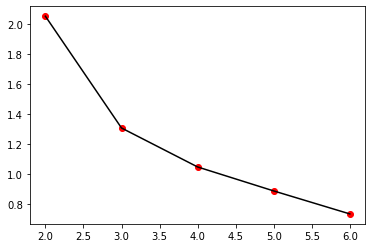

In [11]:
plt.plot(nc,dis,color="black")
plt.scatter(nc,dis,color="red")
plt.show()

# Silhouette Score

In [12]:
from sklearn.metrics import silhouette_score as sil # determines whether there are large gaps between each sample and all other samples within the same cluster or across different clusters.

In [13]:
nc= [2,3,4,5,6,7,8,9]
sc_score=[]
for i in nc:
    km =KMeans(i)
    model =km.fit_predict(df_new.iloc[:,:4])
    sc_score.append(sil(df_new.iloc[:,:4],model))

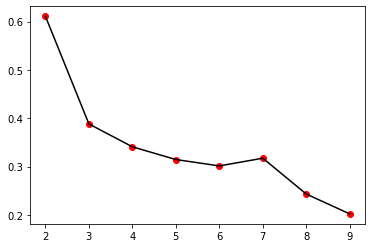

In [14]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

# Calinski_Harabasz_Score

In [15]:
from sklearn.metrics import calinski_harabasz_score as chs # to evaluate the goodness of split by k means

In [16]:
nc=[2,3,4,5,6,7,8,9]
ch_score = []
for i in nc:
    km =KMeans(i)
    y = km.fit_predict(df_new.iloc[:,:4])
    ch_score.append(chs(df_new.iloc[:,:4],y))

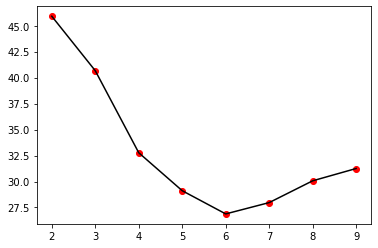

In [17]:
plt.plot(nc,ch_score,color="black")
plt.scatter(nc,ch_score,color="red")
plt.show()

# Hierachical Clustering

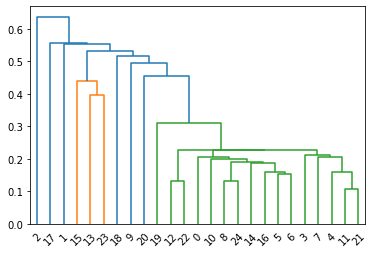

In [18]:
dendrogram = sch.dendrogram(sch.linkage(df_new,method='single')) # it createsgroups so that objects within a group are similar to each other and different from objects in other gropus

In [19]:
hc = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                            linkage='single')

In [20]:
model_pred = hc.fit_predict(df_new)
model_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [22]:
df_new["h_cluster_id"]= model_pred

In [23]:
df_new.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_cluster_id
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,0
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,0
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,1
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,0
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,0


In [24]:
df["h_cluster_id"]=model_pred

In [25]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_cluster_id
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0


In [26]:
df.groupby(["h_cluster_id"])["Univ"].apply(lambda x:tuple(x))

h_cluster_id
0    (Brown, CalTech, Columbia, Cornell, Dartmouth,...
1                                               (CMU,)
Name: Univ, dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


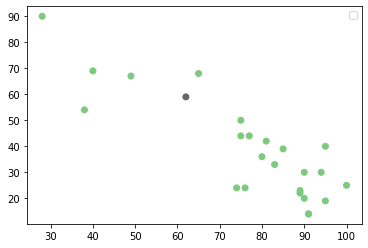

In [27]:
plt.scatter(df.iloc[:,2],df.iloc[:,3],c=model_pred,cmap=plt.cm.Accent)
plt.legend() 

# Kmeans

In [28]:
model = KMeans(n_clusters=2) # to find groupd which have not been explicitly labeled in the data
model.fit(df_new)

KMeans(n_clusters=2)

In [29]:
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0])

In [30]:
df["lables"]=pd.Series(model.labels_)

In [31]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_cluster_id,lables
0,Brown,1310,89,22,13,22704,94,0,0
1,CalTech,1415,100,25,6,63575,81,0,0
2,CMU,1260,62,59,9,25026,72,1,1
3,Columbia,1310,76,24,12,31510,88,0,0
4,Cornell,1280,83,33,13,21864,90,0,0


In [32]:
df.groupby(["lables"])["Univ"].apply(lambda x :tuple(x))

lables
0    (Brown, CalTech, Columbia, Cornell, Dartmouth,...
1    (CMU, PennState, Purdue, TexasA&M, UMichigan, ...
Name: Univ, dtype: object

In [34]:
df[df.Univ.isin(["Brown", "Columbia", "Cornell"])]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_cluster_id,lables
0,Brown,1310,89,22,13,22704,94,0,0
3,Columbia,1310,76,24,12,31510,88,0,0
4,Cornell,1280,83,33,13,21864,90,0,0


# DB Scan

In [35]:
import pandas as pd   # its ability to detect clusters that are irregularly shaped.
from sklearn.datasets import make_moons

In [36]:
x,y = make_moons(100)
df = pd.DataFrame(x)
df.columns=["x1","x2"]
df["class"]= y

In [37]:
df.head()

,x1,x2,class
0,0.159600,0.987182,0
1,0.345365,0.938468,0
2,0.427883,-0.320172,1
3,0.967295,0.253655,0
4,0.801414,0.598111,0


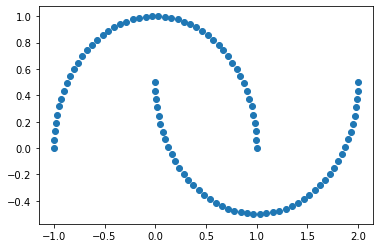

In [38]:
plt.scatter(df.x1,df.x2,cmap=plt.cm.autumn)

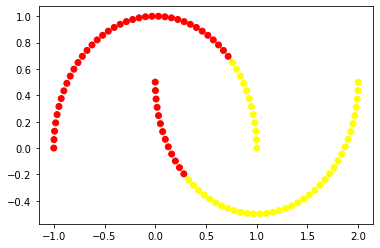

In [39]:
# KMEANS
model = KMeans(n_clusters=2,max_iter=500,algorithm="auto")
model.fit(df.iloc[:,:2])
plt.scatter(df.x1,df.x2,c=model.labels_,cmap=plt.cm.autumn)

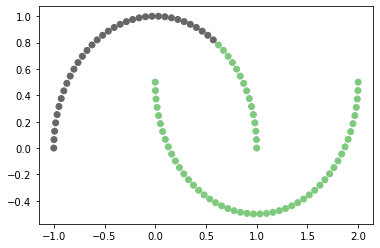

In [40]:
#HIERARCHIACL
model = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
plt.scatter(df.x1,df.x2,c=model.fit_predict(df.iloc[:,:]),cmap=plt.cm.Accent)

# using DB Scan

In [41]:
model = DBSCAN(eps=0.2, min_samples=2)

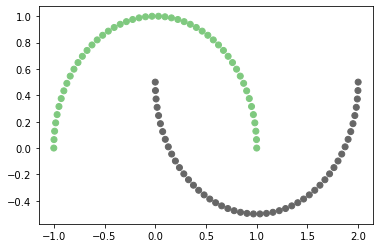

In [42]:
y_pred=model.fit_predict(df.iloc[:,:2])
plt.scatter(df.x1,df.x2,c=y_pred,cmap=plt.cm.Accent)